In [58]:
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import model
import kernels
import utils
import trainer
import draw

# Loading data

In [59]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.5, random_state = 5)

# Data visualization

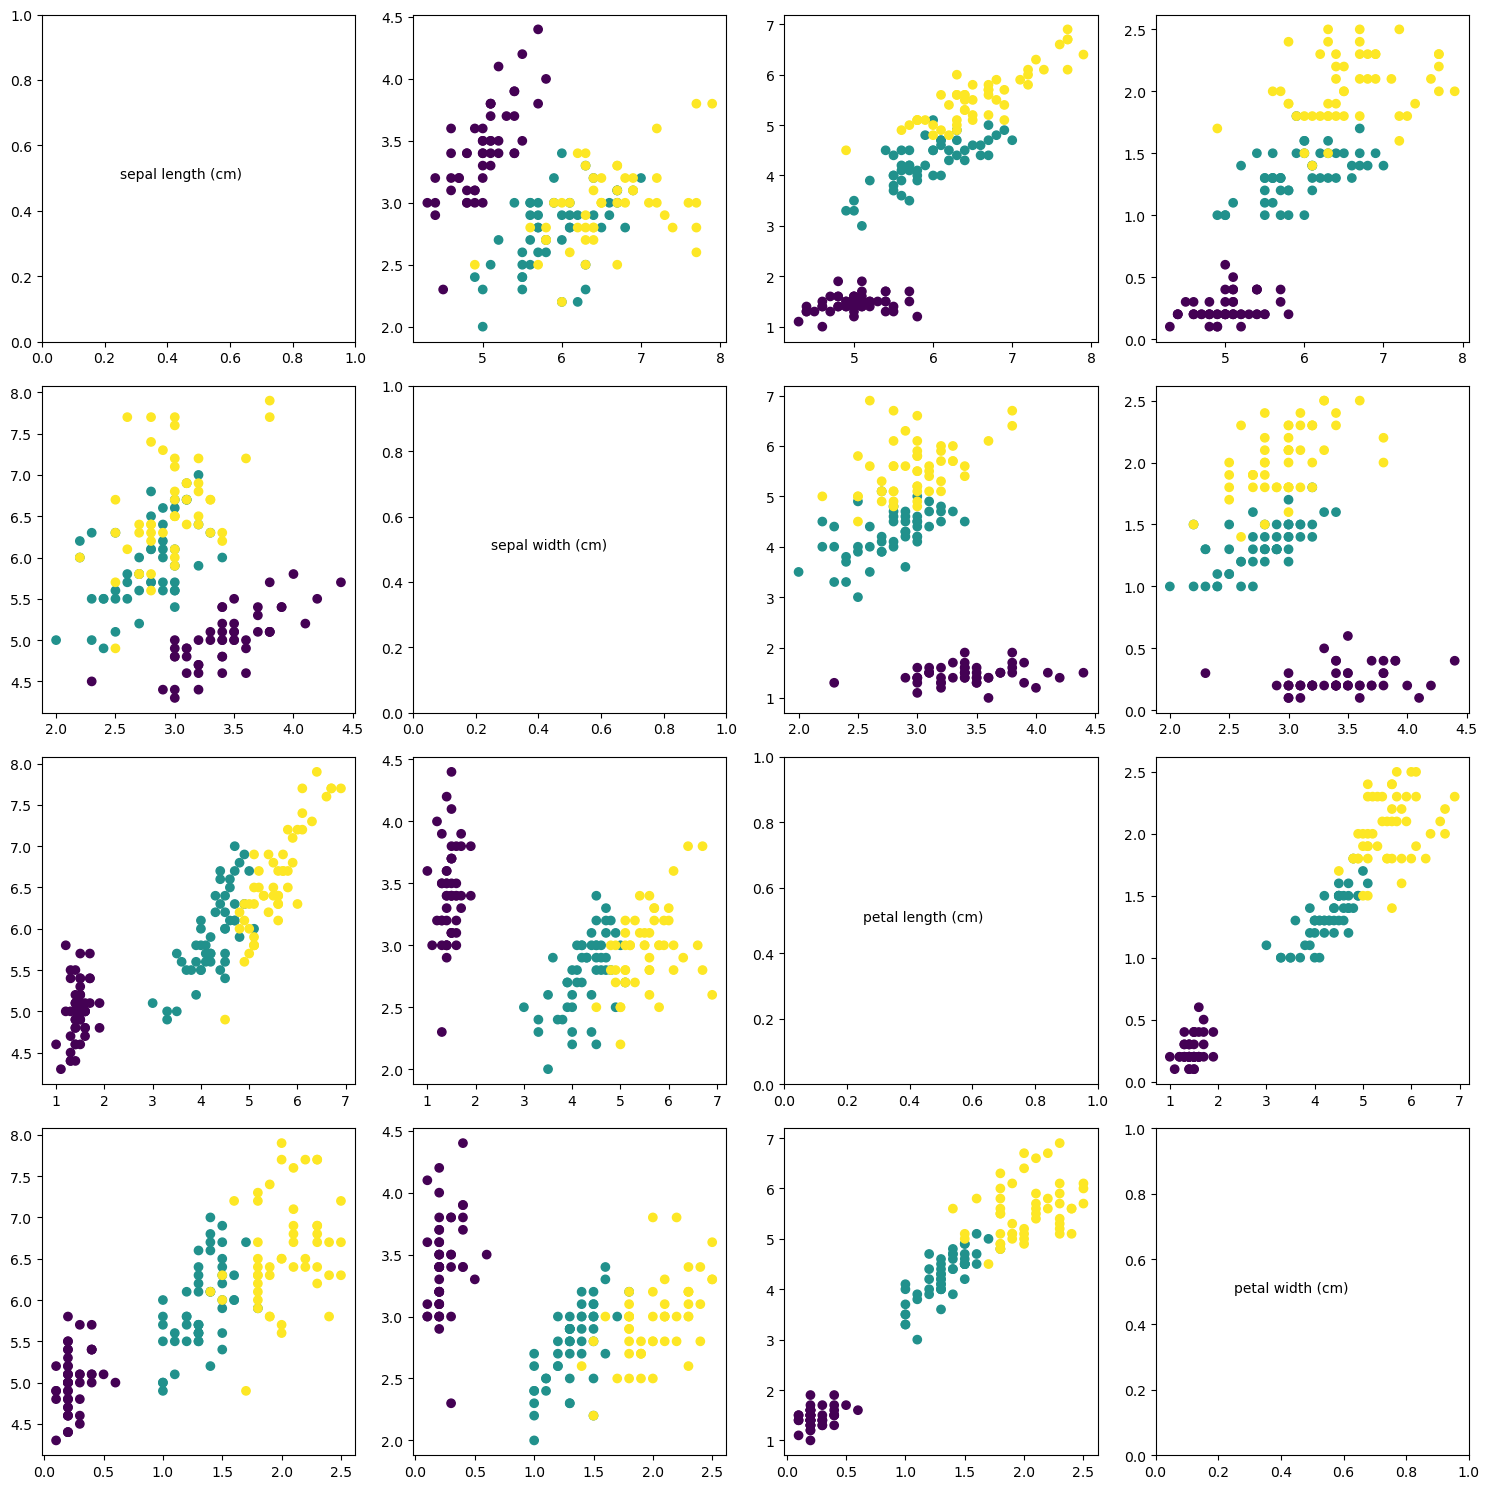

In [60]:
draw.plot_features_data(X, Y, iris.feature_names)

# Initialization

In [61]:
model = model.Model(train_Y.shape[0], utils.max_distance(train_X), kernels.Gauss, 2)
trainer = trainer.Trainer()

# Training

Epoch 1 completed
Epoch 2 completed
Epoch 3 completed
Epoch 4 completed
Epoch 5 completed
Epoch 6 completed
Epoch 7 completed
Epoch 8 completed
Epoch 9 completed
Epoch 10 completed
Epoch 11 completed
Epoch 12 completed
Epoch 13 completed
Epoch 14 completed
Epoch 15 completed
Epoch 16 completed
Epoch 17 completed
Epoch 18 completed
Epoch 19 completed
Epoch 20 completed


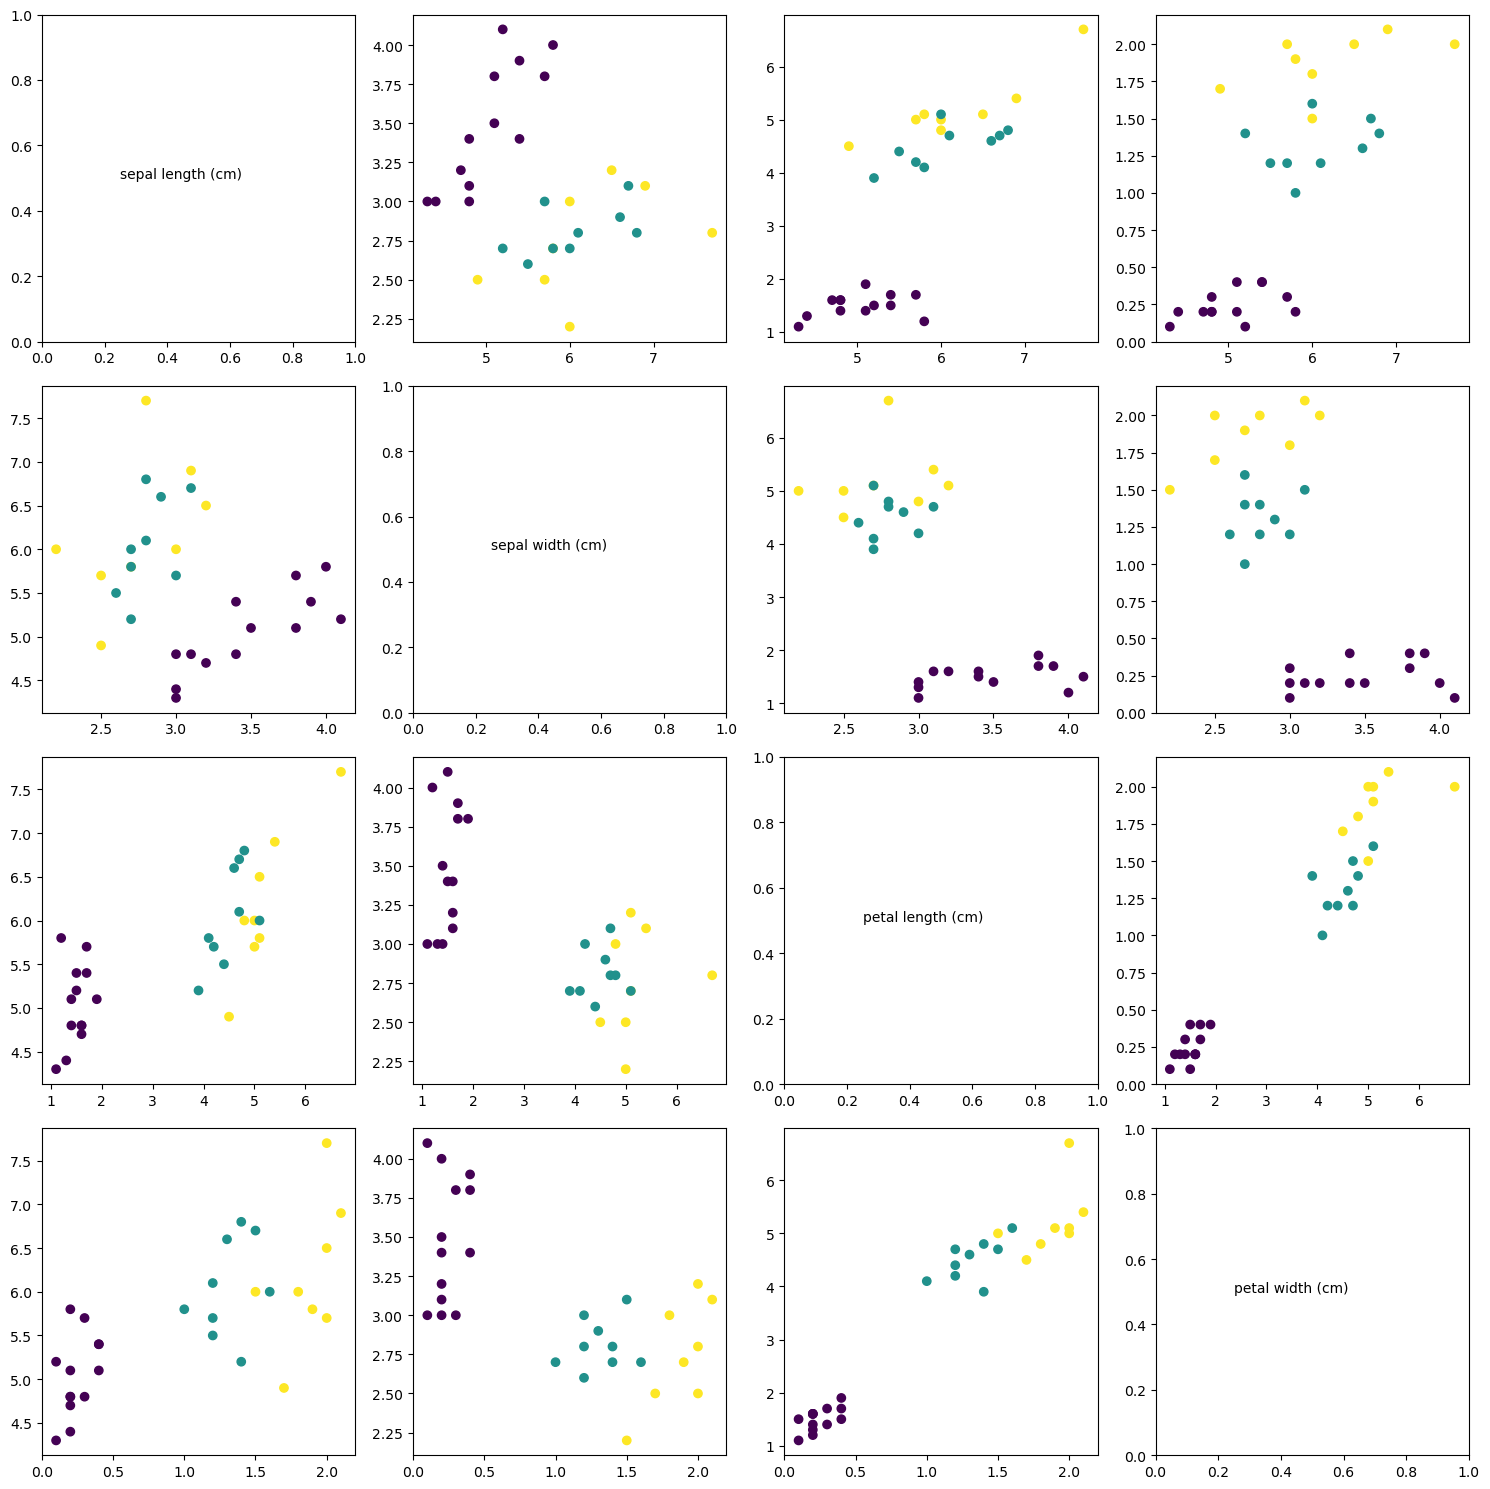

In [62]:
trainer.train(model, train_X, train_Y, 20)
non_zero_weights = model.non_zero_weights()
draw.plot_features_data(train_X[non_zero_weights], train_Y[non_zero_weights], iris.feature_names)

# Visualization results

71/75
Accuracy: 0.9466666666666667


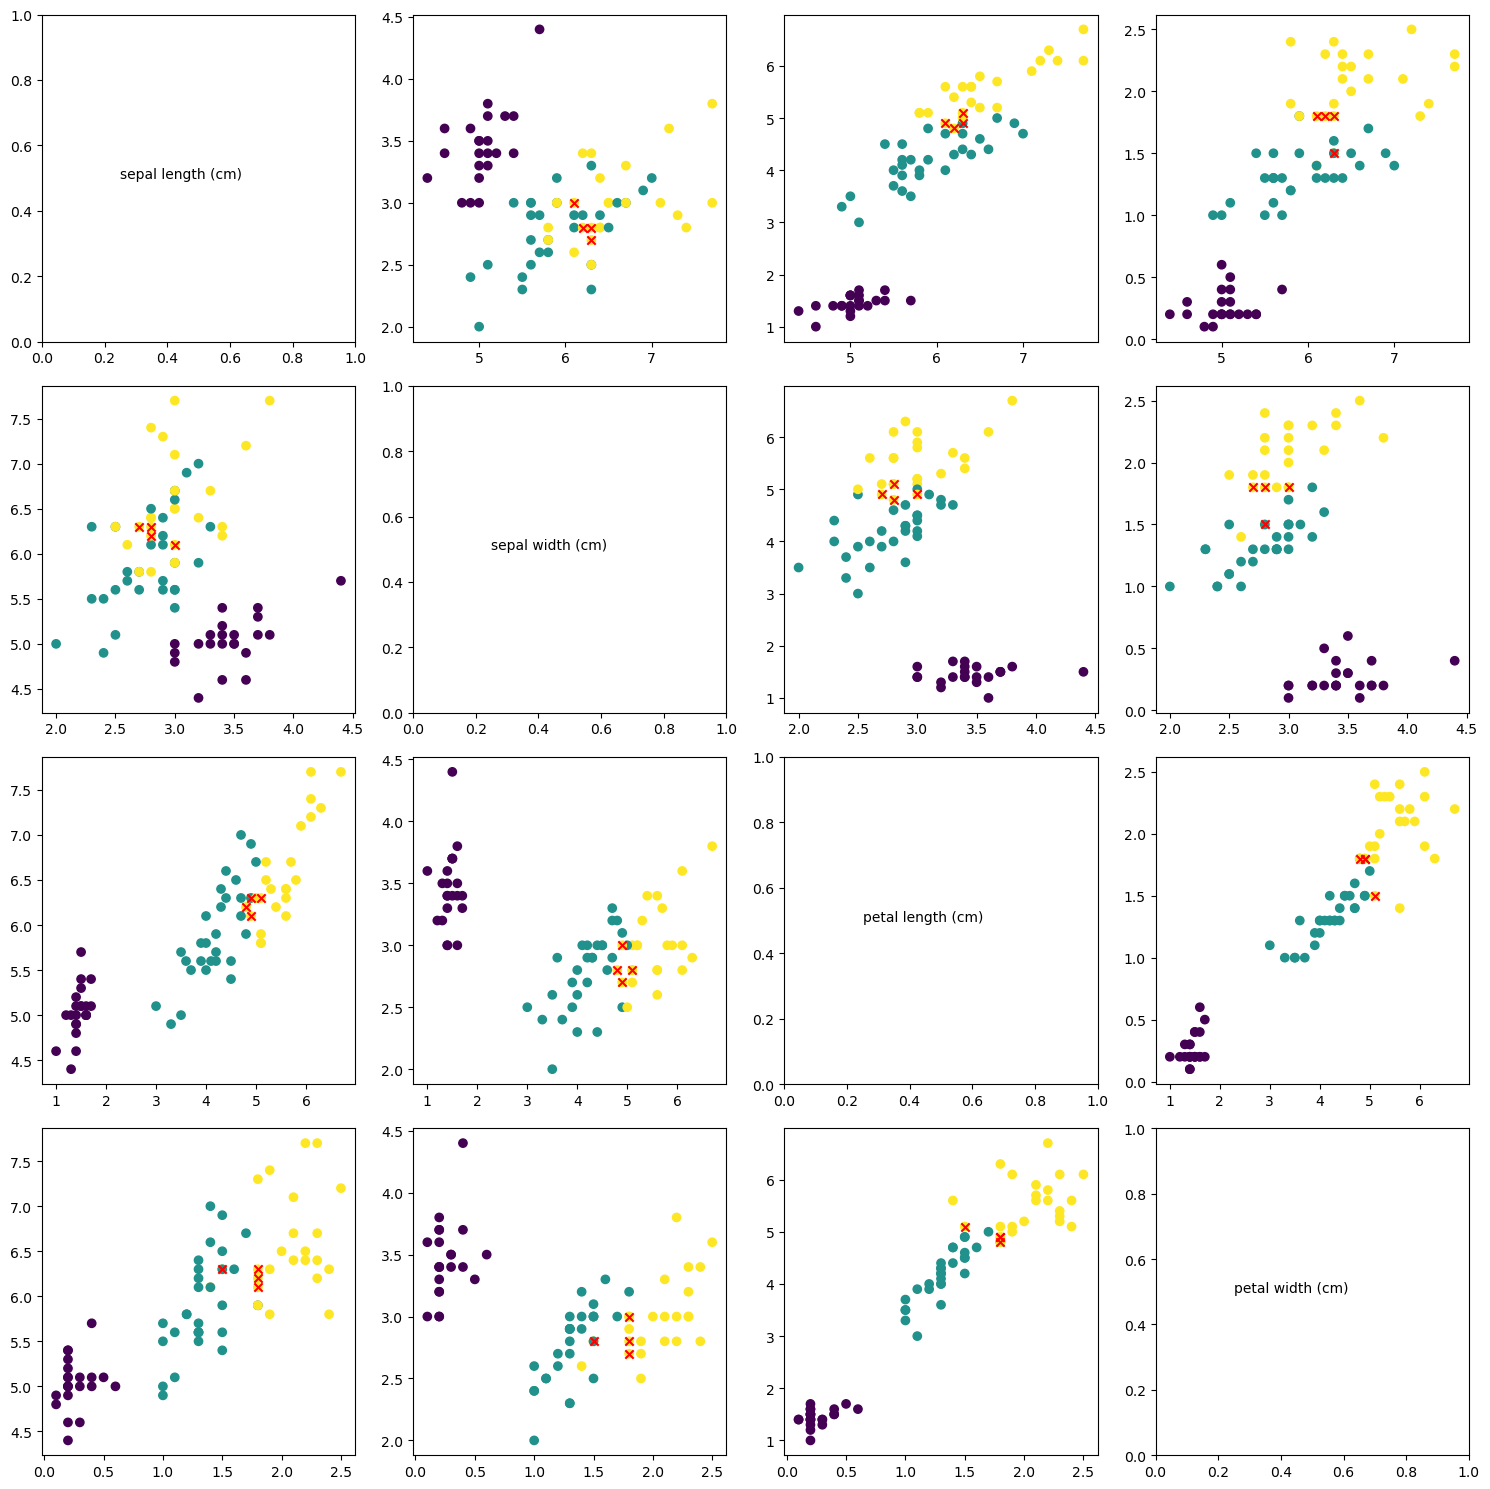

In [63]:
predicts = model.predicts(test_X, train_X, train_Y)
utils.accuracy(predicts, test_Y)
wrongs = utils.wrong_indexes(predicts, test_Y)
draw.plot_features_data(test_X, test_Y, iris.feature_names, wrongs)

# Compare with Sklearn

69/75
Accuracy: 0.92


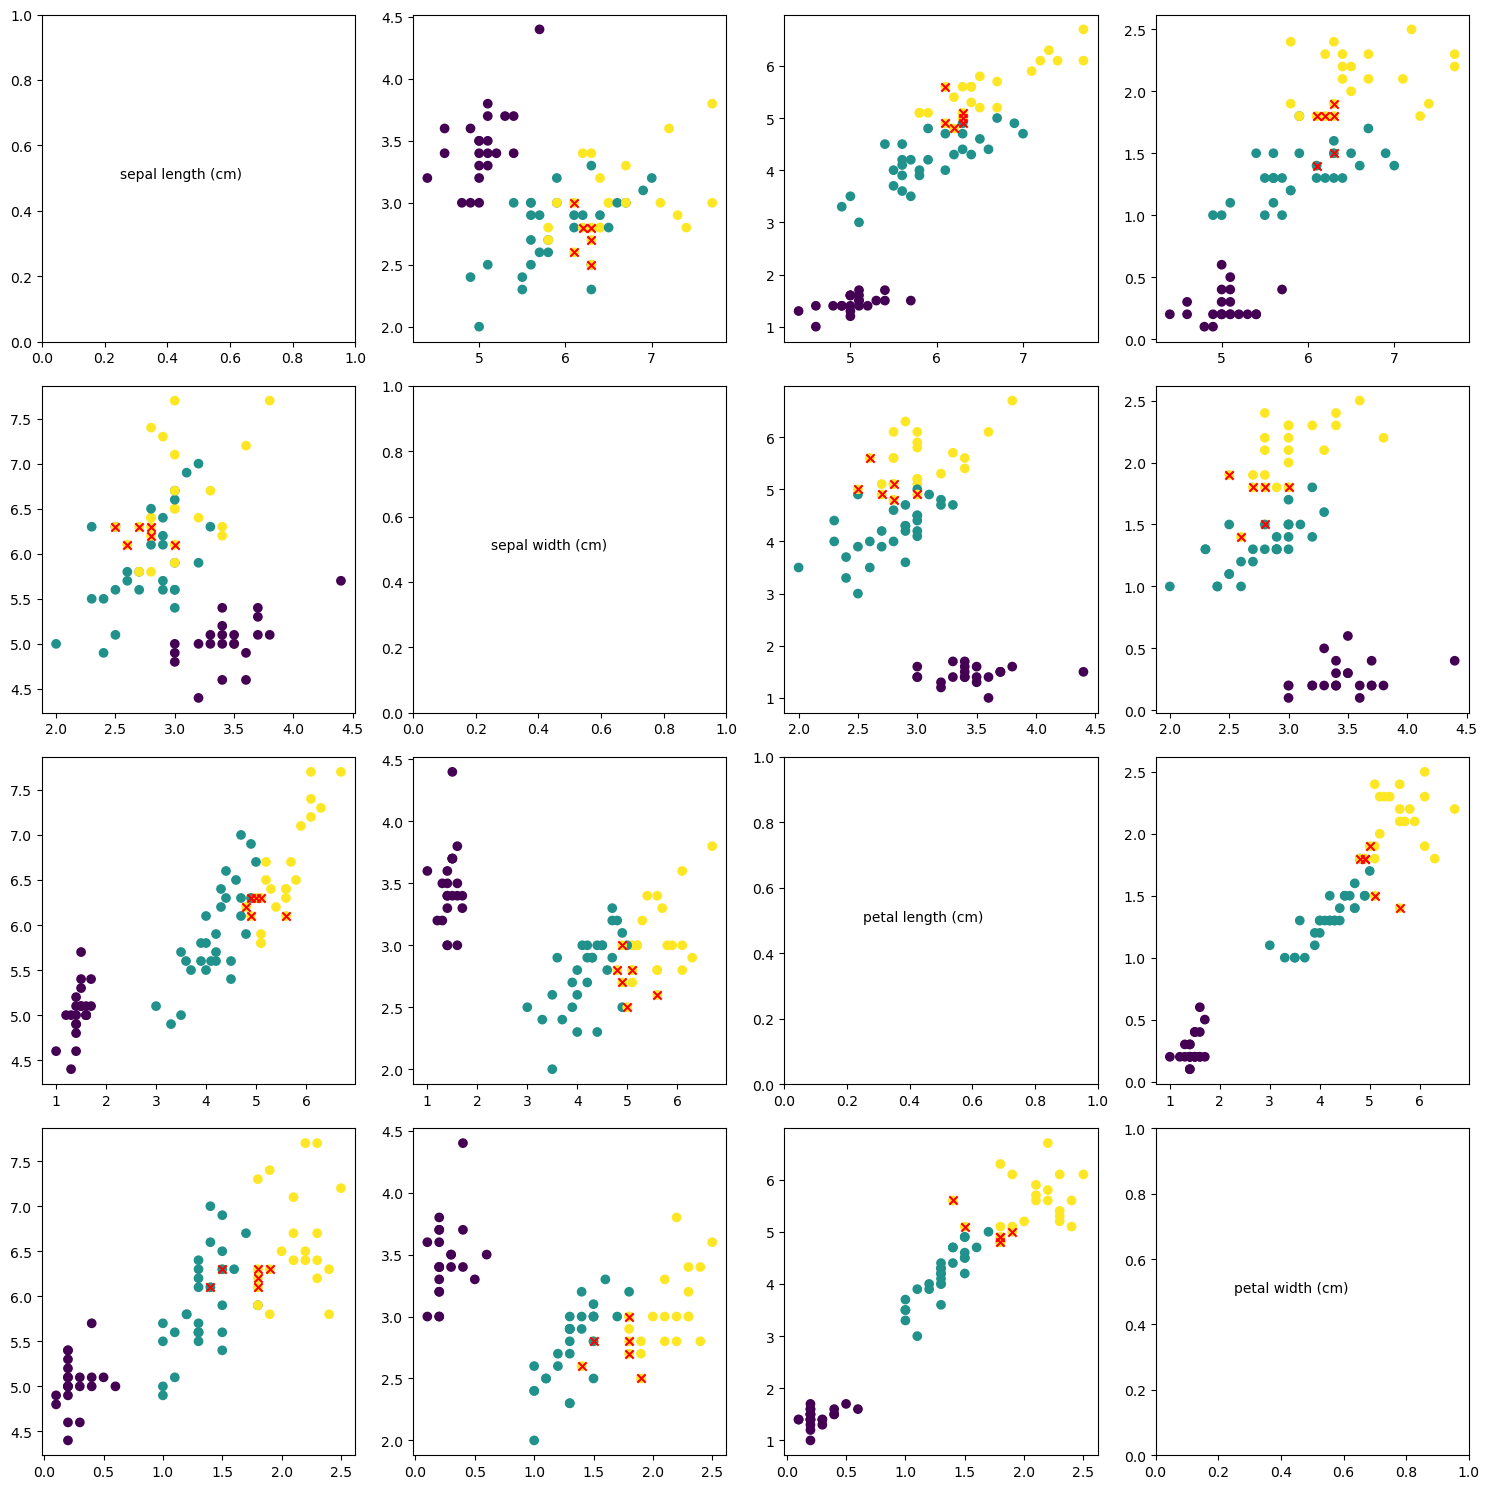

In [64]:
neigh = KNeighborsClassifier(n_neighbors=2, weights=kernels.ApplyToNP(kernels.Rect))
neigh.fit(train_X, train_Y)
neigh_preds = neigh.predict(test_X)
utils.accuracy(neigh_preds, test_Y)
idx = np.where(neigh_preds != test_Y)
draw.plot_features_data(test_X, test_Y, iris.feature_names, idx)